# Introduction to Metabolic Scaling Theory

**Part II: Metabolic Scaling Theory and Biological Fractals**

---

## Overview

This notebook introduces the fundamental concepts of **Metabolic Scaling Theory (MST)** and its relationship to fractal geometry in biological systems. We explore the critical distinction between **self-similar** and **self-affine** fractals, and demonstrate why vascular organisms exhibit self-affine rather than self-similar geometry.

## Learning Objectives

By the end of this notebook, you will be able to:

1. Understand the historical development of allometry and metabolic scaling
2. Distinguish between self-similar and self-affine fractals
3. Generate and visualize both types of fractal structures
4. Understand why biological branching networks are self-affine
5. Apply appropriate fractal dimension measurements to each type

## Key Concepts

### Allometry

"Allometry" is the study of organismal size and physiological rates of change in relation to body parts (Huxley 1932). The term "allometric" translates from Latin as "different measure," while "isometric" means "equal measure."

- **Allometric scaling**: Physiological or morphological traits change at *different* rates compared to overall size
- **Isometric scaling**: Maintains the same ratio of lengths, making objects appear identical at different scales

### Self-Similarity vs Self-Affinity

- **Self-similar fractals**: Same appearance at all scales (uniform scaling in all directions)
- **Self-affine fractals**: Different scaling rates in different directions (anisotropic scaling)

This distinction is crucial because vascular organisms grow with different rates in different dimensions (allometric scaling), making them inherently self-affine.

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, FancyBboxPatch
from matplotlib.collections import PatchCollection
import matplotlib.transforms as transforms
%matplotlib inline

# Set style for publication-quality figures
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 16

## Historical Background

### Timeline of Key Discoveries

| Year | Researcher | Contribution |
|------|------------|-------------|
| 1883 | Rubner | Surface rule for metabolism |
| 1932 | Kleiber | 3/4 power law for metabolism |
| 1932 | Huxley | Allometric growth theory |
| 1975 | Mandelbrot | Introduced "fractal" terminology |
| 1985 | Mandelbrot | Self-affine fractals |
| 1997 | West, Brown, Enquist | Metabolic Scaling Theory |

### Kleiber's Law

Max Kleiber (1932) discovered that metabolic rate $B$ scales with body mass $M$ as:

$$B \propto M^{3/4}$$

This 3/4 exponent (rather than Rubner's 2/3 surface rule) holds across 23 orders of magnitude in body size, suggesting a fundamental principle underlying metabolic organization.

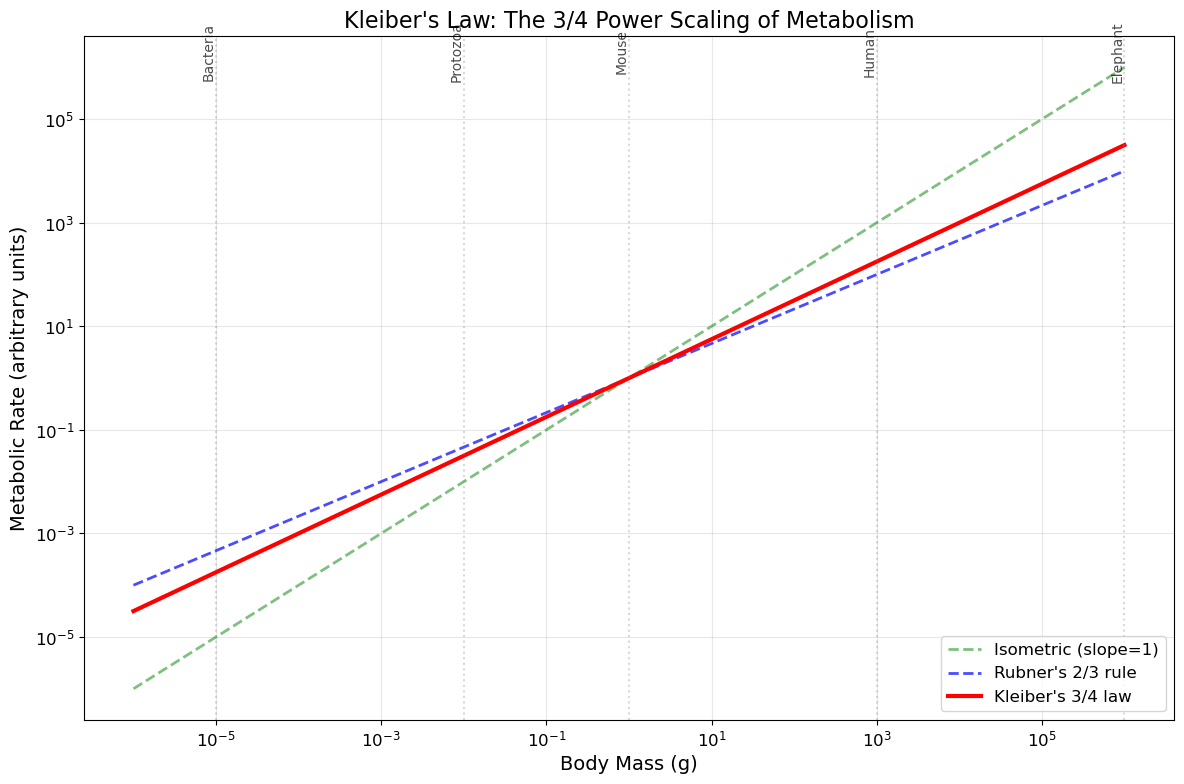

Key insight: The 3/4 exponent suggests that organisms are not simple
geometric shapes, but have fractal-like internal structure that
optimizes resource distribution.


In [2]:
def plot_kleiber_law():
    """Visualize Kleiber's Law: metabolic rate vs body mass."""
    
    # Body masses spanning many orders of magnitude (in grams)
    mass = np.logspace(-6, 6, 100)  # From bacteria to elephants
    
    # Metabolic rates (normalized)
    rubner_23 = mass ** (2/3)      # Rubner's surface rule
    kleiber_34 = mass ** (3/4)     # Kleiber's law
    isometric = mass ** 1          # Linear scaling
    
    fig, ax = plt.subplots(figsize=(12, 8))
    
    ax.loglog(mass, isometric, 'g--', alpha=0.5, linewidth=2, label='Isometric (slope=1)')
    ax.loglog(mass, rubner_23, 'b--', alpha=0.7, linewidth=2, label="Rubner's 2/3 rule")
    ax.loglog(mass, kleiber_34, 'r-', linewidth=3, label="Kleiber's 3/4 law")
    
    # Add organism labels
    organisms = [
        (1e-5, 'Bacteria'),
        (1e-2, 'Protozoa'),
        (1, 'Mouse'),
        (1e3, 'Human'),
        (1e6, 'Elephant')
    ]
    
    for mass_val, name in organisms:
        ax.axvline(mass_val, color='gray', alpha=0.3, linestyle=':')
        ax.text(mass_val, ax.get_ylim()[1]*0.5, name, rotation=90, 
                va='center', ha='right', fontsize=10, alpha=0.7)
    
    ax.set_xlabel('Body Mass (g)', fontsize=14)
    ax.set_ylabel('Metabolic Rate (arbitrary units)', fontsize=14)
    ax.set_title("Kleiber's Law: The 3/4 Power Scaling of Metabolism", fontsize=16)
    ax.legend(fontsize=12)
    ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print("Key insight: The 3/4 exponent suggests that organisms are not simple")
    print("geometric shapes, but have fractal-like internal structure that")
    print("optimizes resource distribution.")

plot_kleiber_law()

## Self-Similar Fractals

A **self-similar** fractal looks the same at all scales. When you zoom in, you see the same structure repeated. The scaling is **isotropic** - the same in all directions.

### Mathematical Definition

For a self-similar set, if we scale by factor $r$, the number of copies $N$ follows:

$$N = r^D$$

where $D$ is the fractal dimension.

### Examples:
- Sierpinski triangle
- Koch snowflake
- Menger sponge
- Symmetric Pythagoras tree (45° angles)

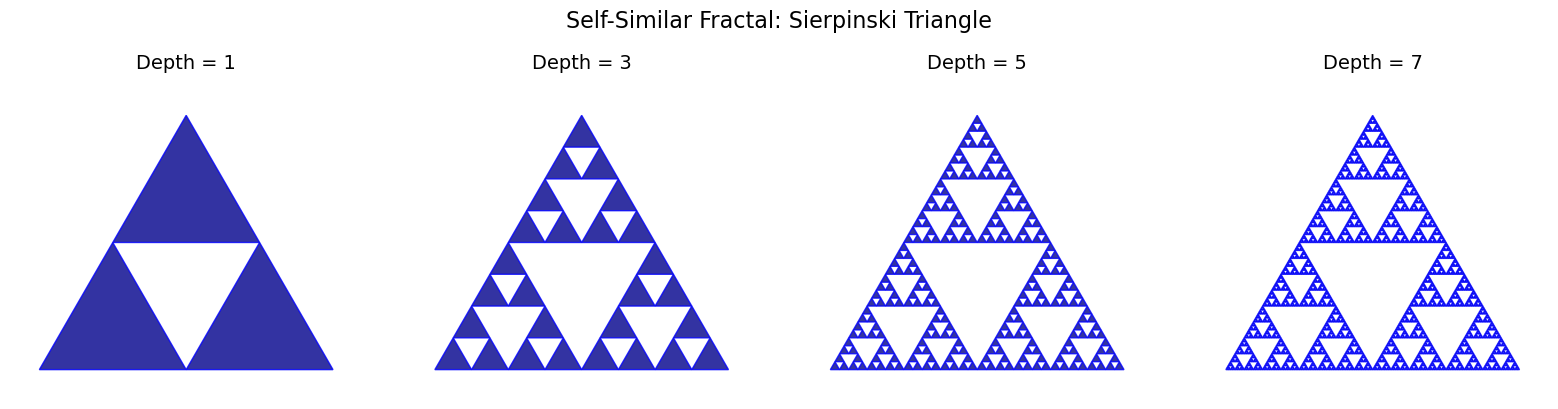

Sierpinski Triangle Fractal Dimension: D = log(3)/log(2) = 1.5850

This is between 1 (line) and 2 (filled area), as expected for a fractal.


In [3]:
def sierpinski_triangle(ax, vertices, depth):
    """Recursively draw a Sierpinski triangle."""
    if depth == 0:
        triangle = plt.Polygon(vertices, fill=True, facecolor='darkblue', 
                               edgecolor='blue', alpha=0.8)
        ax.add_patch(triangle)
        return
    
    # Calculate midpoints
    mid01 = (vertices[0] + vertices[1]) / 2
    mid12 = (vertices[1] + vertices[2]) / 2
    mid20 = (vertices[2] + vertices[0]) / 2
    
    # Recurse on three smaller triangles
    sierpinski_triangle(ax, np.array([vertices[0], mid01, mid20]), depth - 1)
    sierpinski_triangle(ax, np.array([mid01, vertices[1], mid12]), depth - 1)
    sierpinski_triangle(ax, np.array([mid20, mid12, vertices[2]]), depth - 1)

def plot_sierpinski():
    """Demonstrate self-similarity with Sierpinski triangle at multiple scales."""
    fig, axes = plt.subplots(1, 4, figsize=(16, 4))
    
    # Initial vertices
    vertices = np.array([[0, 0], [1, 0], [0.5, np.sqrt(3)/2]])
    
    for i, depth in enumerate([1, 3, 5, 7]):
        ax = axes[i]
        sierpinski_triangle(ax, vertices, depth)
        ax.set_xlim(-0.1, 1.1)
        ax.set_ylim(-0.1, 1.0)
        ax.set_aspect('equal')
        ax.set_title(f'Depth = {depth}', fontsize=14)
        ax.axis('off')
    
    fig.suptitle('Self-Similar Fractal: Sierpinski Triangle', fontsize=16, y=1.02)
    plt.tight_layout()
    plt.show()
    
    # Calculate fractal dimension
    N = 3  # Number of self-similar copies
    r = 2  # Scaling factor
    D = np.log(N) / np.log(r)
    print(f"Sierpinski Triangle Fractal Dimension: D = log(3)/log(2) = {D:.4f}")
    print("\nThis is between 1 (line) and 2 (filled area), as expected for a fractal.")

plot_sierpinski()

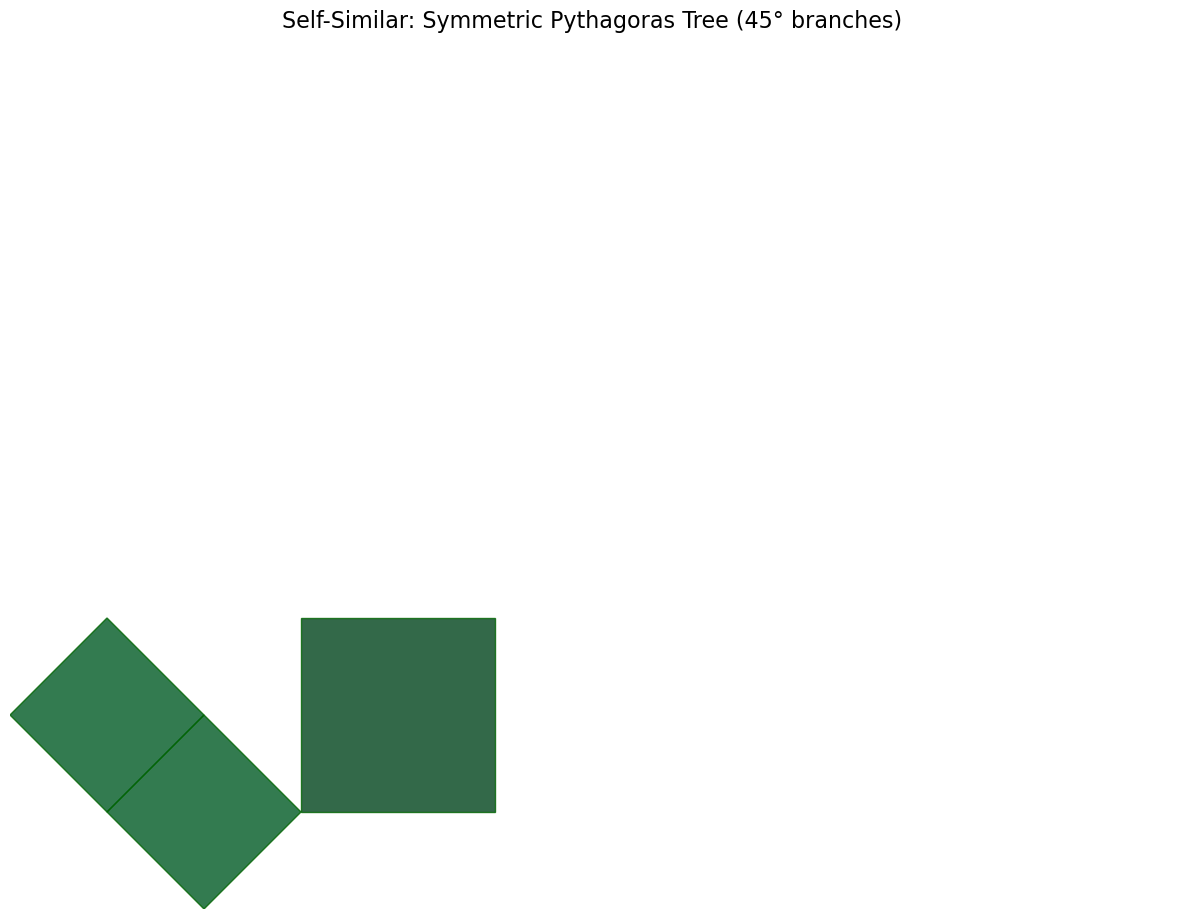

Properties of self-similar Pythagoras tree:
  - Same 45° angle for all branches
  - Same scaling factor (1/√2) for both left and right branches
  - Uniform appearance when zoomed in on any branch


In [4]:
def draw_pythagoras_symmetric(ax, x, y, size, angle, depth):
    """
    Draw a symmetric Pythagoras tree (self-similar).
    All branches scale uniformly with the same angle.
    """
    if depth == 0 or size < 0.5:
        return
    
    # Draw the square trunk
    corners = np.array([
        [x, y],
        [x + size * np.cos(angle), y + size * np.sin(angle)],
        [x + size * np.cos(angle) - size * np.sin(angle), 
         y + size * np.sin(angle) + size * np.cos(angle)],
        [x - size * np.sin(angle), y + size * np.cos(angle)]
    ])
    
    square = plt.Polygon(corners, fill=True, 
                         facecolor=plt.cm.Greens(0.3 + 0.7 * depth/10),
                         edgecolor='darkgreen', alpha=0.8)
    ax.add_patch(square)
    
    # Symmetric branching: 45 degrees on each side
    branch_angle = np.pi / 4  # 45 degrees
    scale_factor = 1 / np.sqrt(2)  # Same scaling in both branches
    new_size = size * scale_factor
    
    # Left branch
    left_angle = angle + branch_angle
    left_x = corners[3][0]
    left_y = corners[3][1]
    draw_pythagoras_symmetric(ax, left_x, left_y, new_size, left_angle, depth - 1)
    
    # Right branch
    right_x = corners[3][0] + new_size * np.cos(left_angle)
    right_y = corners[3][1] + new_size * np.sin(left_angle)
    right_angle = angle - branch_angle + np.pi/2
    draw_pythagoras_symmetric(ax, right_x, right_y, new_size, right_angle, depth - 1)

def plot_symmetric_pythagoras():
    """Show symmetric (self-similar) Pythagoras tree."""
    fig, ax = plt.subplots(figsize=(12, 10))
    
    draw_pythagoras_symmetric(ax, -0.5, 0, 1.0, np.pi/2, depth=10)
    
    ax.set_xlim(-3, 3)
    ax.set_ylim(-0.5, 4)
    ax.set_aspect('equal')
    ax.axis('off')
    ax.set_title('Self-Similar: Symmetric Pythagoras Tree (45° branches)', fontsize=16)
    
    plt.tight_layout()
    plt.show()
    
    print("Properties of self-similar Pythagoras tree:")
    print("  - Same 45° angle for all branches")
    print("  - Same scaling factor (1/√2) for both left and right branches")
    print("  - Uniform appearance when zoomed in on any branch")

plot_symmetric_pythagoras()

## Self-Affine Fractals

A **self-affine** fractal has different scaling in different directions. The structure changes appearance depending on which direction you zoom.

### Mathematical Definition

For a self-affine set, scaling is anisotropic:

$$f(\lambda_x x, \lambda_y y) \stackrel{d}{=} \lambda_x^{H_x} \lambda_y^{H_y} f(x, y)$$

where $H_x$ and $H_y$ are different Hurst exponents in each direction.

### Key Properties:
- **Anisotropic scaling**: Different scaling rates in different directions
- **Scale-dependent dimension**: Fractal dimension can vary between local and global scales
- **Allometric behavior**: Similar to how organisms grow with different proportions at different sizes

### Examples:
- Fractional Brownian motion
- Coastlines and terrain
- **Vascular branching networks** (the key biological example)
- Asymmetric Pythagoras trees

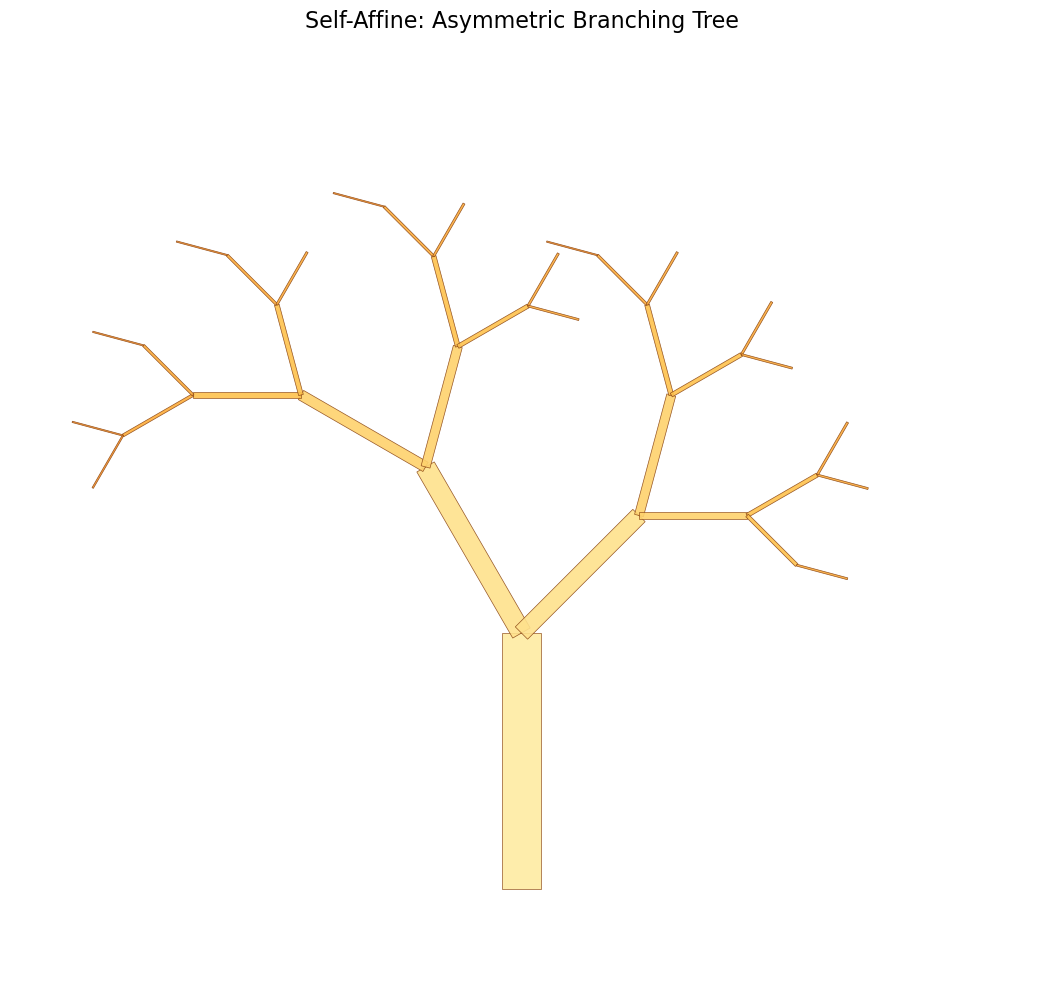

Properties of self-affine branching tree:
  - Asymmetric angles (30° left, 45° right)
  - Different length scaling (0.75 left, 0.65 right)
  - Width scales at different rate than length
  - More like real biological trees!


In [5]:
def draw_pythagoras_asymmetric(ax, x, y, size, angle, depth, width_scale=1.0):
    """
    Draw an asymmetric Pythagoras tree (self-affine).
    Different scaling for length vs width, and asymmetric angles.
    """
    if depth == 0 or size < 0.3:
        return
    
    # Width decreases faster than length (allometric scaling)
    width = size * width_scale * 0.15
    
    # Draw rectangle trunk (not square - different length vs width)
    dx = size * np.cos(angle)
    dy = size * np.sin(angle)
    wx = width * np.cos(angle + np.pi/2)
    wy = width * np.sin(angle + np.pi/2)
    
    corners = np.array([
        [x - wx/2, y - wy/2],
        [x + wx/2, y + wy/2],
        [x + dx + wx/2, y + dy + wy/2],
        [x + dx - wx/2, y + dy - wy/2]
    ])
    
    color = plt.cm.YlOrBr(0.2 + 0.6 * (10 - depth) / 10)
    rect = plt.Polygon(corners, fill=True, facecolor=color,
                       edgecolor='saddlebrown', linewidth=0.5, alpha=0.9)
    ax.add_patch(rect)
    
    # Asymmetric branching angles and scaling
    left_angle_offset = np.pi / 6   # 30 degrees
    right_angle_offset = np.pi / 4  # 45 degrees (different!)
    
    # Different scaling factors (self-affine property)
    length_scale_left = 0.75
    length_scale_right = 0.65
    width_scale_child = 0.7  # Width decreases at different rate
    
    # Branch origin
    branch_x = x + dx
    branch_y = y + dy
    
    # Left branch
    draw_pythagoras_asymmetric(ax, branch_x, branch_y, 
                               size * length_scale_left, 
                               angle + left_angle_offset, 
                               depth - 1, width_scale * width_scale_child)
    
    # Right branch
    draw_pythagoras_asymmetric(ax, branch_x, branch_y, 
                               size * length_scale_right, 
                               angle - right_angle_offset, 
                               depth - 1, width_scale * width_scale_child)

def plot_asymmetric_pythagoras():
    """Show asymmetric (self-affine) Pythagoras tree."""
    fig, ax = plt.subplots(figsize=(12, 10))
    
    draw_pythagoras_asymmetric(ax, 0, 0, 1.5, np.pi/2, depth=10)
    
    ax.set_xlim(-3, 3)
    ax.set_ylim(-0.5, 5)
    ax.set_aspect('equal')
    ax.axis('off')
    ax.set_title('Self-Affine: Asymmetric Branching Tree', fontsize=16)
    
    plt.tight_layout()
    plt.show()
    
    print("Properties of self-affine branching tree:")
    print("  - Asymmetric angles (30° left, 45° right)")
    print("  - Different length scaling (0.75 left, 0.65 right)")
    print("  - Width scales at different rate than length")
    print("  - More like real biological trees!")

plot_asymmetric_pythagoras()

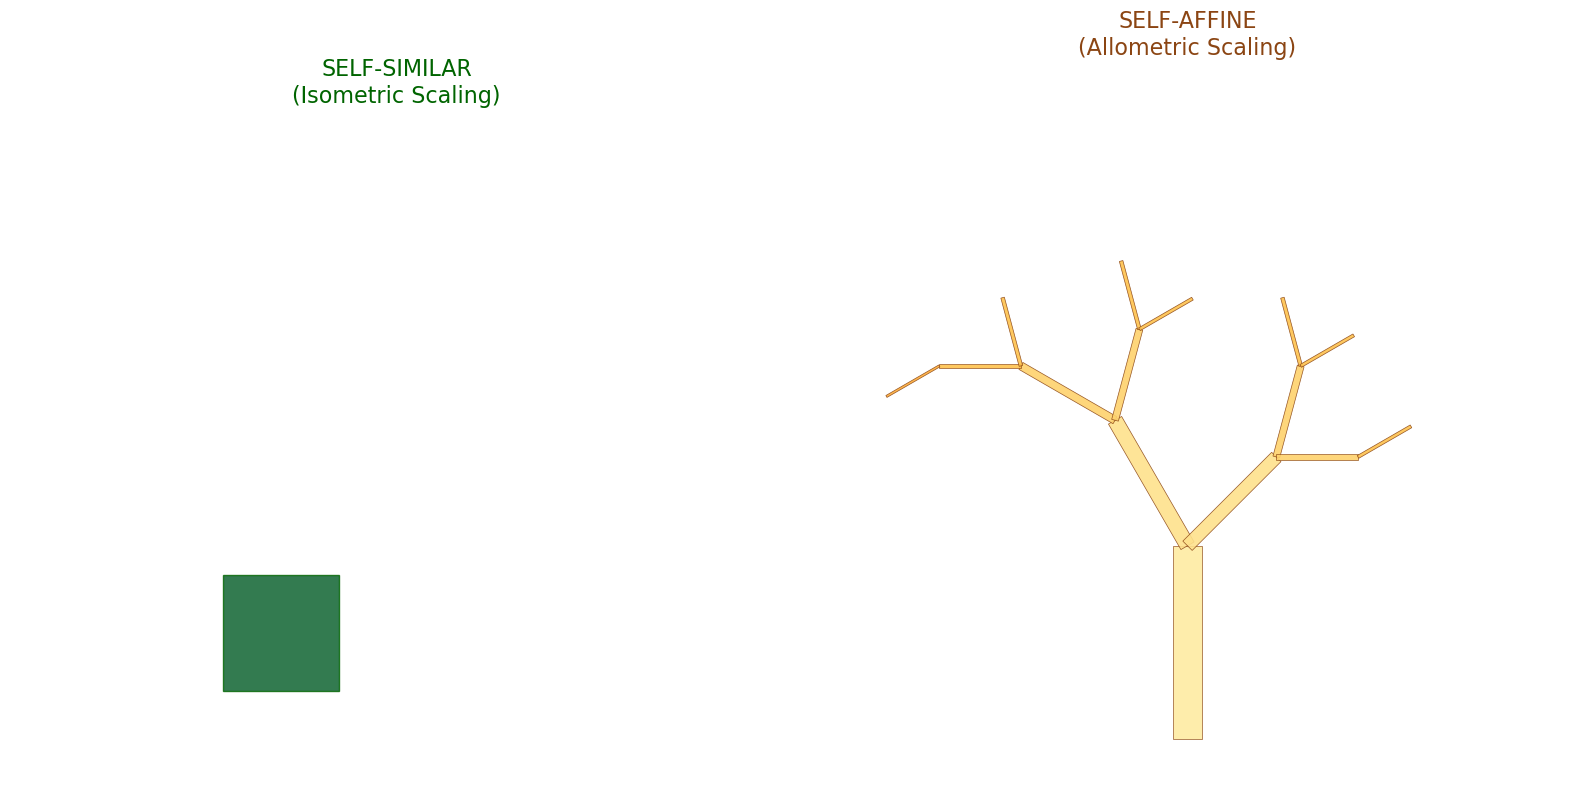


KEY DISTINCTION

Self-Similar (Left):
  - Same structure at all scales
  - Uniform scaling factor: r = 1/√2 in all directions
  - Standard box-counting gives accurate fractal dimension

Self-Affine (Right):
  - Different scaling in different directions
  - Length scales as: γ = n^(-1/3)
  - Radius scales as: ξ = n^(-1/2)
  - Requires differential box-counting for accurate dimension

BIOLOGICAL IMPLICATION: Real vascular organisms are SELF-AFFINE!


In [6]:
def compare_fractals():
    """Side-by-side comparison of self-similar vs self-affine."""
    fig, axes = plt.subplots(1, 2, figsize=(16, 8))
    
    # Self-similar (symmetric)
    ax1 = axes[0]
    draw_pythagoras_symmetric(ax1, -0.3, 0, 0.6, np.pi/2, depth=9)
    ax1.set_xlim(-2, 2)
    ax1.set_ylim(-0.3, 3)
    ax1.set_aspect('equal')
    ax1.axis('off')
    ax1.set_title('SELF-SIMILAR\n(Isometric Scaling)', fontsize=16, color='darkgreen')
    
    # Self-affine (asymmetric)
    ax2 = axes[1]
    draw_pythagoras_asymmetric(ax2, 0, 0, 1.0, np.pi/2, depth=10)
    ax2.set_xlim(-2, 2)
    ax2.set_ylim(-0.3, 3.5)
    ax2.set_aspect('equal')
    ax2.axis('off')
    ax2.set_title('SELF-AFFINE\n(Allometric Scaling)', fontsize=16, color='saddlebrown')
    
    plt.tight_layout()
    plt.show()
    
    print("\n" + "="*70)
    print("KEY DISTINCTION")
    print("="*70)
    print("\nSelf-Similar (Left):")
    print("  - Same structure at all scales")
    print("  - Uniform scaling factor: r = 1/√2 in all directions")
    print("  - Standard box-counting gives accurate fractal dimension")
    print("\nSelf-Affine (Right):")
    print("  - Different scaling in different directions")
    print("  - Length scales as: γ = n^(-1/3)")
    print("  - Radius scales as: ξ = n^(-1/2)")
    print("  - Requires differential box-counting for accurate dimension")
    print("\n" + "="*70)
    print("BIOLOGICAL IMPLICATION: Real vascular organisms are SELF-AFFINE!")
    print("="*70)

compare_fractals()

## Fractional Brownian Motion: The Archetypal Self-Affine Process

**Fractional Brownian motion (fBm)** is the canonical example of a self-affine stochastic process. It's characterized by the **Hurst exponent** $H \in (0, 1)$:

$$B_H(at) \stackrel{d}{=} a^H B_H(t)$$

### Relationship to Fractal Dimension

For fBm in $n$ dimensions, the fractal dimension is:

$$D = n + 1 - H$$

- **$H = 0.5$**: Standard Brownian motion, $D = 1.5$ for curves
- **$H < 0.5$**: Anti-persistent (rougher), higher dimension
- **$H > 0.5$**: Persistent (smoother), lower dimension

### Connection to 1/f Noise

All $1/f^\beta$ noises are self-affine (Mandelbrot 1985), with:

$$\beta = 2H + 1$$

Examples:
- White noise: $\beta = 0$ (H = -0.5, theoretical)
- Pink noise: $\beta = 1$ (H = 0)
- Brownian noise: $\beta = 2$ (H = 0.5)

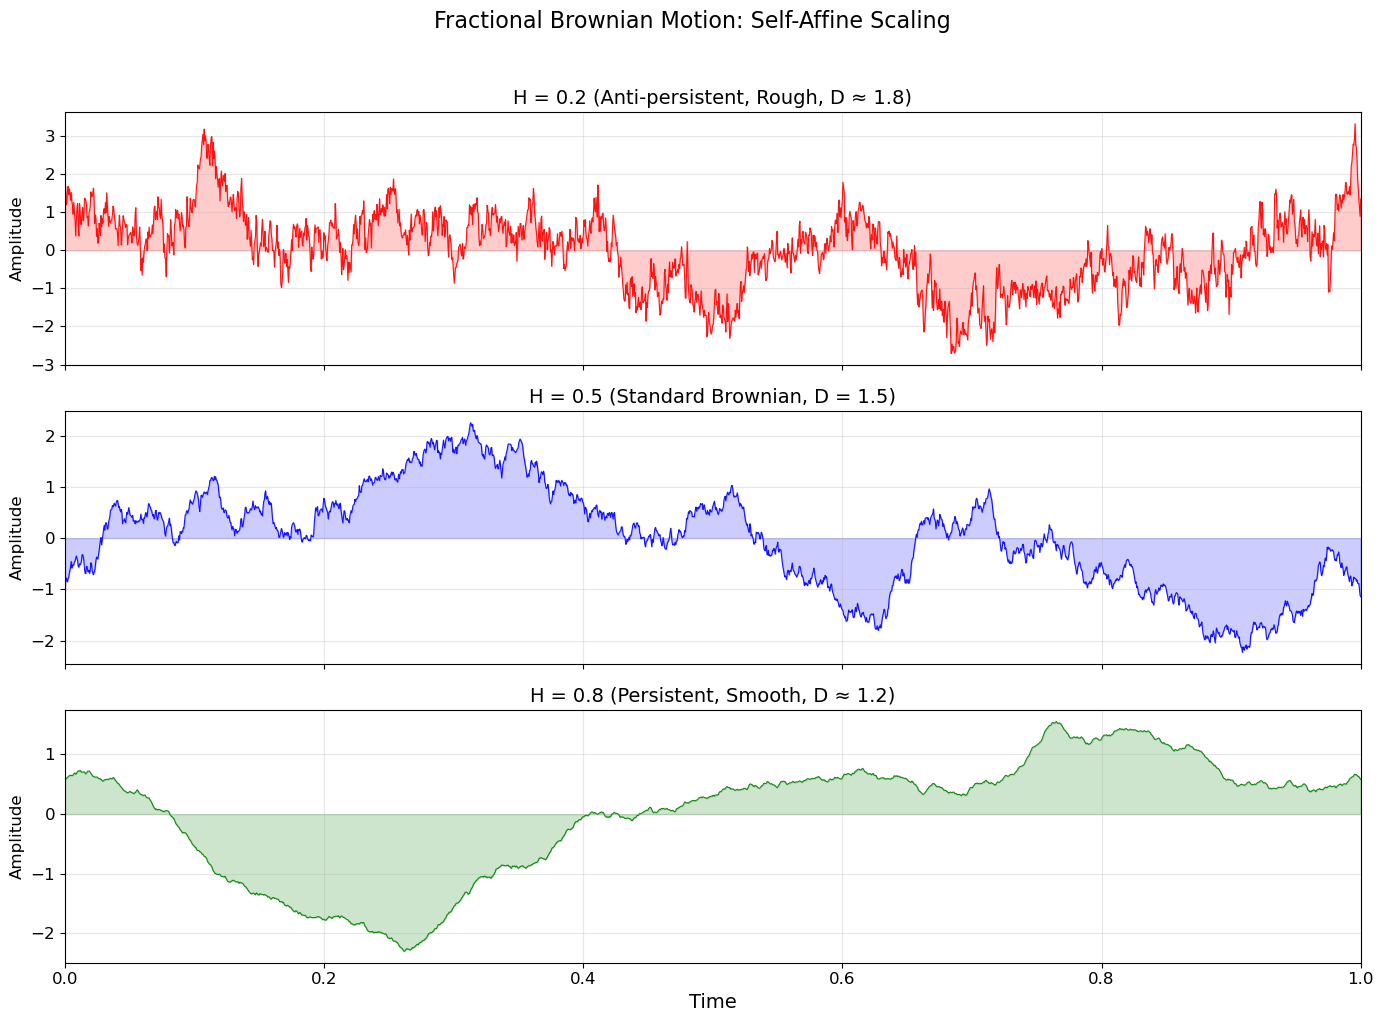

Key observations:
  - Lower H → rougher signal → higher fractal dimension
  - Higher H → smoother signal → lower fractal dimension
  - D = 2 - H for 1D traces


In [7]:
def generate_fbm_1d(n_points, H):
    """
    Generate 1D fractional Brownian motion using spectral synthesis.
    
    Parameters:
    -----------
    n_points : int
        Number of points to generate
    H : float
        Hurst exponent (0 < H < 1)
    
    Returns:
    --------
    ndarray : fBm trace
    """
    # Frequency components
    freq = np.fft.fftfreq(n_points)
    freq[0] = 1e-10  # Avoid division by zero
    
    # Power spectrum: S(f) ~ f^(-2H-1)
    power_spectrum = np.abs(freq) ** (-(2*H + 1))
    power_spectrum[0] = 0
    
    # Random phases
    phases = 2 * np.pi * np.random.random(n_points)
    
    # Construct Fourier coefficients
    amplitude = np.sqrt(power_spectrum / 2)
    fourier_coef = amplitude * np.exp(1j * phases)
    
    # Inverse FFT
    fbm = np.fft.ifft(fourier_coef).real
    
    # Normalize
    fbm = (fbm - fbm.mean()) / fbm.std()
    
    return fbm

def plot_fbm_comparison():
    """Compare fBm with different Hurst exponents."""
    fig, axes = plt.subplots(3, 1, figsize=(14, 10), sharex=True)
    
    n_points = 2048
    t = np.linspace(0, 1, n_points)
    
    H_values = [0.2, 0.5, 0.8]
    colors = ['red', 'blue', 'green']
    titles = [
        'H = 0.2 (Anti-persistent, Rough, D ≈ 1.8)',
        'H = 0.5 (Standard Brownian, D = 1.5)',
        'H = 0.8 (Persistent, Smooth, D ≈ 1.2)'
    ]
    
    for ax, H, color, title in zip(axes, H_values, colors, titles):
        fbm = generate_fbm_1d(n_points, H)
        ax.plot(t, fbm, color=color, linewidth=0.8, alpha=0.9)
        ax.fill_between(t, 0, fbm, alpha=0.2, color=color)
        ax.set_ylabel('Amplitude', fontsize=12)
        ax.set_title(title, fontsize=14)
        ax.grid(True, alpha=0.3)
        ax.set_xlim(0, 1)
    
    axes[-1].set_xlabel('Time', fontsize=14)
    
    fig.suptitle('Fractional Brownian Motion: Self-Affine Scaling', fontsize=16, y=1.02)
    plt.tight_layout()
    plt.show()
    
    print("Key observations:")
    print("  - Lower H → rougher signal → higher fractal dimension")
    print("  - Higher H → smoother signal → lower fractal dimension")
    print("  - D = 2 - H for 1D traces")

plot_fbm_comparison()

## Why Biological Organisms Are Self-Affine

### The WBE Model Predictions

West, Brown, and Enquist (1997, 1999) showed that optimal branching networks in organisms have **different scaling exponents** for different dimensions:

**Branching ratios:**

$$\xi = \frac{r_{k+1}}{r_k} = n^{-1/2}$$

$$\gamma = \frac{l_{k+1}}{l_k} = n^{-1/3}$$

where:
- $\xi$ is the radius ratio between branching levels
- $\gamma$ is the length ratio between branching levels
- $n$ is the number of daughter branches

**Since $\xi \neq \gamma$, the scaling is anisotropic → self-affine!**

### Allometric Consequences

This anisotropic scaling leads to the famous metabolic allometry:

$$B \propto M^{3/4}$$

The 3/4 exponent emerges naturally from the self-affine geometry of optimal branching networks.

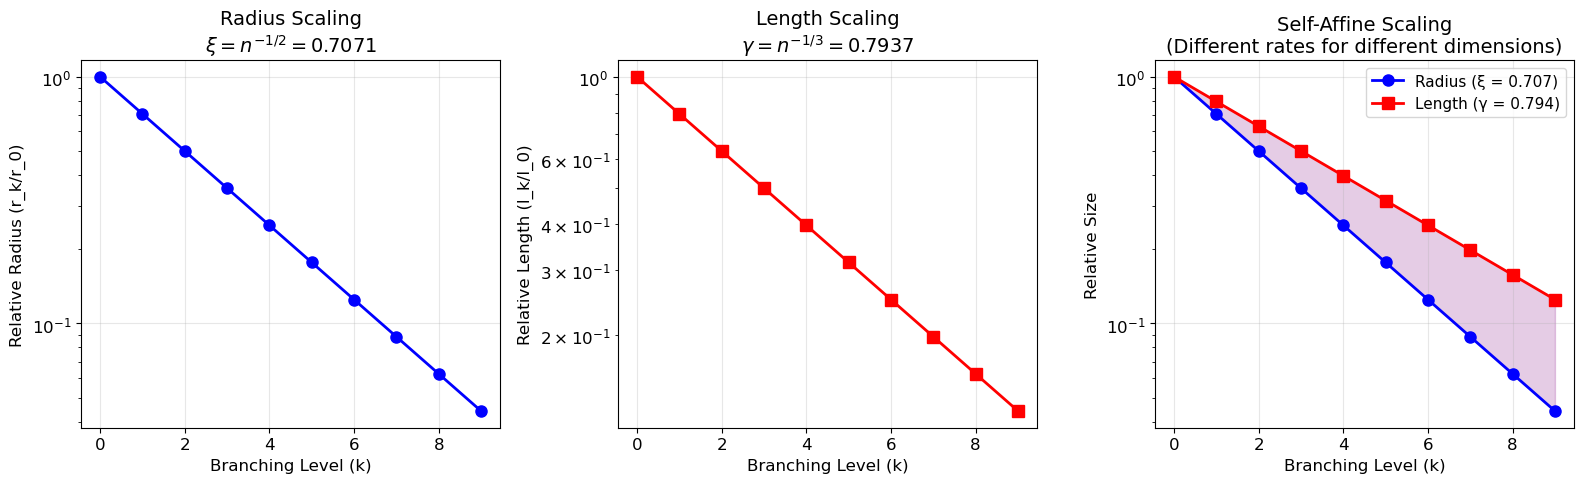

WBE Branching Ratios (for binary branching, n=2):
  Radius ratio:  ξ = 2^(-1/2) = 0.7071
  Length ratio:  γ = 2^(-1/3) = 0.7937

Since ξ ≠ γ, the branching is ANISOTROPIC (self-affine)

This leads to the 3/4 metabolic scaling exponent!


In [8]:
def plot_wbe_branching():
    """
    Visualize WBE branching ratios showing self-affine scaling.
    """
    fig, axes = plt.subplots(1, 3, figsize=(16, 5))
    
    # Number of branching levels
    levels = np.arange(0, 10)
    n = 2  # Binary branching
    
    # WBE scaling exponents
    xi = n ** (-1/2)   # Radius ratio
    gamma = n ** (-1/3)  # Length ratio
    
    # Calculate normalized dimensions at each level
    radii = xi ** levels
    lengths = gamma ** levels
    
    # Plot 1: Radius vs Level
    ax1 = axes[0]
    ax1.semilogy(levels, radii, 'o-', color='blue', linewidth=2, markersize=8)
    ax1.set_xlabel('Branching Level (k)', fontsize=12)
    ax1.set_ylabel('Relative Radius (r_k/r_0)', fontsize=12)
    ax1.set_title(f'Radius Scaling\n$\\xi = n^{{-1/2}} = {xi:.4f}$', fontsize=14)
    ax1.grid(True, alpha=0.3)
    
    # Plot 2: Length vs Level
    ax2 = axes[1]
    ax2.semilogy(levels, lengths, 's-', color='red', linewidth=2, markersize=8)
    ax2.set_xlabel('Branching Level (k)', fontsize=12)
    ax2.set_ylabel('Relative Length (l_k/l_0)', fontsize=12)
    ax2.set_title(f'Length Scaling\n$\\gamma = n^{{-1/3}} = {gamma:.4f}$', fontsize=14)
    ax2.grid(True, alpha=0.3)
    
    # Plot 3: Comparison
    ax3 = axes[2]
    ax3.semilogy(levels, radii, 'o-', color='blue', linewidth=2, 
                 markersize=8, label=f'Radius (ξ = {xi:.3f})')
    ax3.semilogy(levels, lengths, 's-', color='red', linewidth=2, 
                 markersize=8, label=f'Length (γ = {gamma:.3f})')
    ax3.fill_between(levels, radii, lengths, alpha=0.2, color='purple')
    ax3.set_xlabel('Branching Level (k)', fontsize=12)
    ax3.set_ylabel('Relative Size', fontsize=12)
    ax3.set_title('Self-Affine Scaling\n(Different rates for different dimensions)', fontsize=14)
    ax3.legend(fontsize=11)
    ax3.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print("WBE Branching Ratios (for binary branching, n=2):")
    print(f"  Radius ratio:  ξ = 2^(-1/2) = {xi:.4f}")
    print(f"  Length ratio:  γ = 2^(-1/3) = {gamma:.4f}")
    print(f"\nSince ξ ≠ γ, the branching is ANISOTROPIC (self-affine)")
    print(f"\nThis leads to the 3/4 metabolic scaling exponent!")

plot_wbe_branching()

## Implications for Fractal Dimension Measurements

### The Problem with Standard Box-Counting

Standard box-counting assumes **self-similar** scaling and produces:

$$N(\varepsilon) \propto \varepsilon^{-D}$$

For **self-affine** objects, this gives incorrect results because:
1. The dimension varies between local and global scales
2. Different directions scale differently
3. The box-counting exponent doesn't capture the true fractal behavior

### The Solution: Differential Box-Counting

For self-affine fractals like biological networks, we need **differential box-counting** which:
1. Measures the **mass dimension** rather than perimeter dimension
2. Accounts for the grayscale/height information
3. Properly captures the anisotropic scaling

### MST Prediction for Mass Dimension

From MST theory, the predicted mass fractal dimension is:

$$D_m = \frac{3}{2}$$

This is the dimension we expect when correctly measuring self-affine biological networks.

In [9]:
def display_dimension_table():
    """Display reported vs predicted fractal dimensions."""
    
    print("="*80)
    print("Comparison of Fractal Dimension Measurements")
    print("="*80)
    print("\n{:<30} {:<20} {:<20}".format(
        "Method", "Typical Result", "Appropriate For"))
    print("-"*70)
    
    data = [
        ("Standard Box-Counting", "D ≈ 1.8 - 1.9", "Self-similar fractals"),
        ("Differential Box-Counting", "D ≈ 1.5 - 1.6", "Self-affine fractals"),
        ("MST Prediction", "D = 3/2 = 1.5", "Biological networks"),
    ]
    
    for method, result, appropriate in data:
        print("{:<30} {:<20} {:<20}".format(method, result, appropriate))
    
    print("\n" + "="*80)
    print("\nKey Finding:")
    print("  Papers using standard box-counting on biological systems")
    print("  report D ≈ 1.8-1.9, but this is INCORRECT for self-affine systems.")
    print("  \n  Using differential box-counting gives D ≈ 1.5, matching MST predictions.")
    print("="*80)

display_dimension_table()

Comparison of Fractal Dimension Measurements

Method                         Typical Result       Appropriate For     
----------------------------------------------------------------------
Standard Box-Counting          D ≈ 1.8 - 1.9        Self-similar fractals
Differential Box-Counting      D ≈ 1.5 - 1.6        Self-affine fractals
MST Prediction                 D = 3/2 = 1.5        Biological networks 


Key Finding:
  Papers using standard box-counting on biological systems
  report D ≈ 1.8-1.9, but this is INCORRECT for self-affine systems.
  
  Using differential box-counting gives D ≈ 1.5, matching MST predictions.


## Summary

### Key Takeaways

1. **Allometry describes how organisms change shape as they grow** - different body parts scale at different rates

2. **Self-similar fractals have uniform scaling** in all directions, while **self-affine fractals have different scaling** in different directions

3. **Biological vascular networks are self-affine**, not self-similar, because:
   - Branch radius scales as $r \propto n^{-1/2}$
   - Branch length scales as $l \propto n^{-1/3}$

4. **Standard box-counting gives incorrect results** for self-affine objects

5. **Differential box-counting** correctly measures self-affine fractal dimensions

6. **MST predicts $D_m = 3/2$** for biological branching networks, which matches observations when measured correctly

### Next Steps

In the following notebooks, we will:
- Derive the MST equations in detail (Notebook 2)
- Analyze real and synthetic branching networks (Notebook 3)
- Implement differential box-counting (Notebook 4)
- Validate predictions against empirical data (Notebook 5)

---

## References

- Huxley, J.S. (1932). Problems of Relative Growth. Methuen.
- Kleiber, M. (1932). Body size and metabolism. Hilgardia, 6(11), 315-353.
- Mandelbrot, B.B. (1985). Self-affine fractals and fractal dimension. Physica Scripta, 32(4), 257.
- West, G.B., Brown, J.H., & Enquist, B.J. (1997). A general model for the origin of allometric scaling laws in biology. Science, 276(5309), 122-126.
- West, G.B., Brown, J.H., & Enquist, B.J. (1999). The fourth dimension of life: fractal geometry and allometric scaling of organisms. Science, 284(5420), 1677-1679.